### single label classification using train and test set csv. Got max accuracy of ~77% in Linear SVC after  preprocessing, removing stop words, and stemming

In [1]:
# import libraries for classification
import pandas as pd
import numpy as np
import re
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [17]:
#load train, test dataset
train_filename = "train_dropdups.csv"
test_filename = "test_dropdups.csv"
val_filename = "validation_dropdups.csv"

df_train = pd.read_csv(train_filename)
df_test = pd.read_csv(test_filename)
df_val = pd.read_csv(val_filename)

df_train

,TYPE,DOCUMENT_CONTENT,DOCUMENT_CLASS
0,TRAIN,Great News to All Vape Lovers Vapefanz has res...,2
1,TRAIN,Vaprcase 2 Review: Lifegrabber√¢‚Ç¨‚Ñ¢s Soluti...,1
2,TRAIN,i bought 2 boxes and both has 0.8 and 1.2,1
3,TRAIN,pod Fundamentals Explained vanilla - When rega...,1
4,TRAIN,Pretty fun time streaming some VALORANT with m...,2
...,...,...,...
4835,TRAIN,√¢≈° √Ø¬∏¬è√∞≈∏¬ê¬¢ TURTLE JUICE √∞≈∏¬ê¬¢√¢≈° ...,1
4836,TRAIN,Dude check out blankz pods. They make a Juul c...,1
4837,TRAIN,Koko prem vape device here√∞≈∏‚Äò‚Ä∞0562220852...,1
4838,TRAIN,Hero of the day myblu capsules We tell there a...,2


In [3]:
df_train['DOCUMENT_LENGTH'] = [len(doc) for doc in df_train['DOCUMENT_CONTENT']]
# df_train.drop(['DOCUMENT_LENGTH'], axis = 1, inplace = True)
df_train


,TYPE,DOCUMENT_CONTENT,DOCUMENT_CLASS,DOCUMENT_LENGTH
0,TRAIN,Great News to All Vape Lovers Vapefanz has res...,2,748
1,TRAIN,Vaprcase 2 Review: Lifegrabber√¢‚Ç¨‚Ñ¢s Soluti...,1,114
2,TRAIN,i bought 2 boxes and both has 0.8 and 1.2,1,41
3,TRAIN,pod Fundamentals Explained vanilla - When rega...,1,494
4,TRAIN,Pretty fun time streaming some VALORANT with m...,2,111
...,...,...,...,...
4835,TRAIN,√¢≈° √Ø¬∏¬è√∞≈∏¬ê¬¢ TURTLE JUICE √∞≈∏¬ê¬¢√¢≈° ...,1,438
4836,TRAIN,Dude check out blankz pods. They make a Juul c...,1,119
4837,TRAIN,Koko prem vape device here√∞≈∏‚Äò‚Ä∞0562220852...,1,106
4838,TRAIN,Hero of the day myblu capsules We tell there a...,2,246


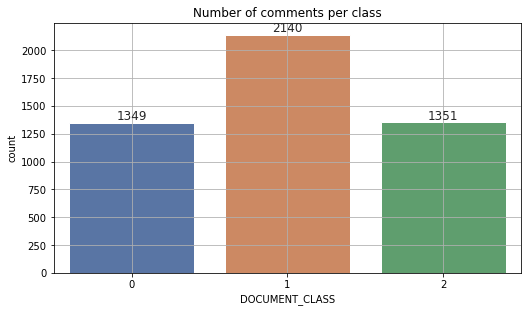

In [4]:
# make a frequency plot for each category

category_counts = {}
for doc_type in df_train['DOCUMENT_CLASS']:
    if doc_type not in category_counts.keys():
        category_counts[doc_type] = 1
    else:
        category_counts[doc_type] += 1

plt.rcParams["figure.figsize"] = [7.50, 4.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
# df_train['DOCUMENT_CLASS'].value_counts().plot(ax=ax, kind='bar')

sns.set(style="ticks")
ax = sns.countplot(x='DOCUMENT_CLASS', data=df_train)
ax.bar_label(ax.containers[0])
plt.title("Number of comments per class")
plt.grid()
plt.show()


In [18]:
X_train = df_train["DOCUMENT_CONTENT"]
X_test = df_test["DOCUMENT_CONTENT"]
X_val = df_val["DOCUMENT_CONTENT"]
y_train = df_train["DOCUMENT_CLASS"].values
y_test = df_test["DOCUMENT_CLASS"].values
y_val = df_val["DOCUMENT_CLASS"].values

X_train.shape

(4840,)

In [19]:
# Clean data
def rm_non_ascii(text):
    # remeove non-ascii characters
    text = re.sub(r'[^\x00-\x7F]+',' ', text)
    # remove digits and underscores
    text = re.sub(r'[0-9_#.]+',' ', text)
    # removes mutiple spaces
    text = " ".join(text.split())
    return text

print("Sample X before cleaning:", X_train[1])
X_train = X_train.apply(rm_non_ascii)
X_test = X_test.apply(rm_non_ascii)
X_val = X_val.apply(rm_non_ascii)
print("Sample X after cleaning:", X_train[1])



Sample X before cleaning: Vaprcase 2 Review: Lifegrabber√¢‚Ç¨‚Ñ¢s Solution to Protect Pax 2 Vaporizers ...#cannabisnews #cannabis #hemp #CBD
Sample X after cleaning: Vaprcase Review: Lifegrabber s Solution to Protect Pax Vaporizers cannabisnews cannabis hemp CBD


In [20]:
# stemming to bring base word form. lemmatisation not req

def stemming(text):
    ps = PorterStemmer()

    words = word_tokenize(text)
    for i in range(len(words)):
        words[i] = ps.stem(words[i])
    text = " ".join(words)
    return text
        
print("Sample X before stemming:", X_train[1])    
X_train = X_train.apply(stemming)
X_test = X_test.apply(stemming)
X_val = X_val.apply(stemming)
print("Sample X after stemming:", X_train[1])


Sample X before stemming: Vaprcase Review: Lifegrabber s Solution to Protect Pax Vaporizers cannabisnews cannabis hemp CBD
Sample X after stemming: vaprcas review : lifegrabb s solut to protect pax vapor cannabisnew cannabi hemp cbd


In [8]:
def show_metrics(y_test, y_pred, label="Classifier"):
    # Calculate confusion matrix

    matrix=confusion_matrix(y_test, y_pred)
    cm_labeled=pd.DataFrame(matrix,index=['0','1','2'],columns=['0','1','2'])
    # True Labels in y-axis/rows. Precision = TP/(TP+FP)
#     print("Confusion Matrix:\n", cm_labeled)
    sns.heatmap(cm_labeled, annot=True)
    plt.show()

    # Get the accuracy
    print('\nAccuracy: {:.5f}\n'.format(accuracy_score(y_test, y_pred)))

    # Print the classification report
    print(f'Classification Report {label}:')
    print(classification_report(y_test, y_pred, target_names=['DOC_0', 'DOC_1', 'DOC_2']))
    return accuracy_score(y_test, y_pred)

In [47]:
# from sklearn.pipeline import Pipeline
# single_label_classifier = Pipeline([
#     ('tf_idf', TfidfVectorizer()),
#     ('clf', MultinomialNB()),
# ])
# y_pred = single_label_classifier.fit(X_train, y_train).predict(X_test)
# -----------------------------------


##  tf-idf vectors ( Term Frequency Inverse Document Frequency ) + removing stop words
tf_idf = TfidfVectorizer(stop_words="english")

tf_idf_X_train = tf_idf.fit_transform(X_train)
tf_idf_X_test = tf_idf.transform(X_test)
tf_idf_X_val = tf_idf.transform(X_val)
print(tf_idf_X_train.shape)
tf_idf_X_train

## print word and its idf values
# for name, value in zip(tf_idf.get_feature_names_out(), tf_idf.idf_):
#     print(f"{name} : {value}")


(4840, 14240)


<4840x14240 sparse matrix of type '<class 'numpy.float64'>'
	with 89254 stored elements in Compressed Sparse Row format>

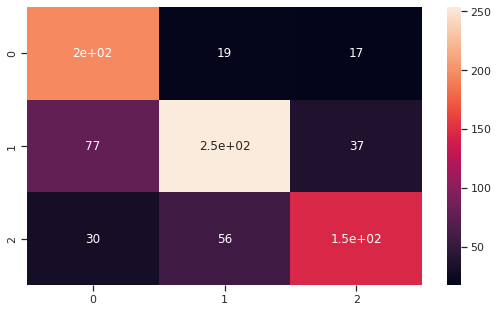


Accuracy: 0.71635

Classification Report ComplementNB:
              precision    recall  f1-score   support

       DOC_0       0.65      0.84      0.73       232
       DOC_1       0.77      0.69      0.73       368
       DOC_2       0.73      0.63      0.68       232

    accuracy                           0.72       832
   macro avg       0.72      0.72      0.71       832
weighted avg       0.73      0.72      0.72       832



0.7163461538461539

In [10]:
# Complement Naive Bayes
cnb = ComplementNB(fit_prior=False)
y_pred = cnb.fit(tf_idf_X_train, y_train).predict(tf_idf_X_test)
show_metrics(y_test, y_pred, label="ComplementNB")


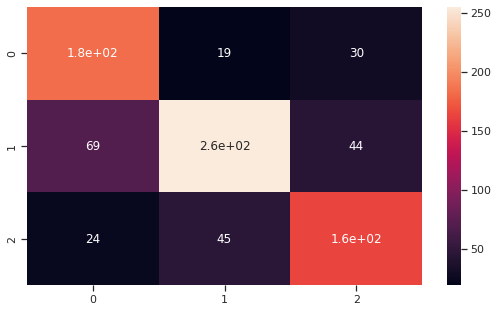


Accuracy: 0.72236

Classification Report MultinomialNB:
              precision    recall  f1-score   support

       DOC_0       0.66      0.79      0.72       232
       DOC_1       0.80      0.69      0.74       368
       DOC_2       0.69      0.70      0.70       232

    accuracy                           0.72       832
   macro avg       0.72      0.73      0.72       832
weighted avg       0.73      0.72      0.72       832



0.7223557692307693

In [11]:
# Multinomial Naive Bayes classifier
gnb = MultinomialNB(fit_prior=False)
y_pred = gnb.fit(tf_idf_X_train, y_train).predict(tf_idf_X_test)
show_metrics(y_test, y_pred, label = "MultinomialNB")

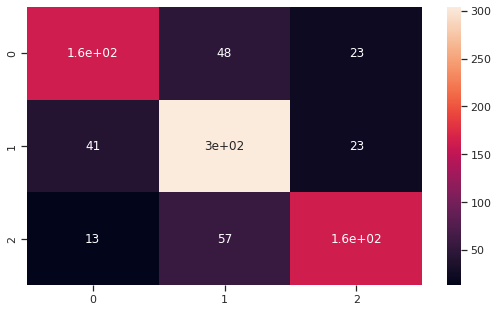


Accuracy: 0.75361

Classification Report LogisticRegression:
              precision    recall  f1-score   support

       DOC_0       0.75      0.69      0.72       232
       DOC_1       0.74      0.83      0.78       368
       DOC_2       0.78      0.70      0.74       232

    accuracy                           0.75       832
   macro avg       0.76      0.74      0.75       832
weighted avg       0.75      0.75      0.75       832



0.7536057692307693

In [12]:
# Logistic Regression
lrgr = LogisticRegression()
y_pred = lrgr.fit(tf_idf_X_train, y_train).predict(tf_idf_X_test)
show_metrics(y_test, y_pred, label="LogisticRegression")

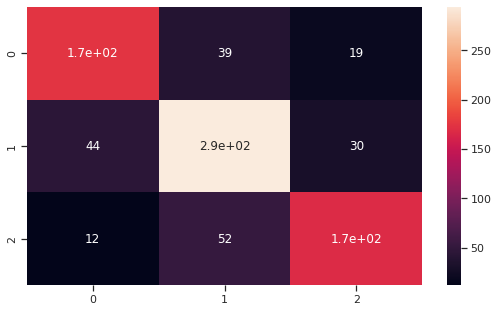


Accuracy: 0.76442

Classification Report LinearSVC:
              precision    recall  f1-score   support

       DOC_0       0.76      0.75      0.75       232
       DOC_1       0.76      0.80      0.78       368
       DOC_2       0.77      0.72      0.75       232

    accuracy                           0.76       832
   macro avg       0.76      0.76      0.76       832
weighted avg       0.76      0.76      0.76       832



0.7644230769230769

In [13]:
# SVM
svc = LinearSVC()
y_pred = svc.fit(tf_idf_X_train, y_train).predict(tf_idf_X_test)
show_metrics(y_test, y_pred, label="LinearSVC")

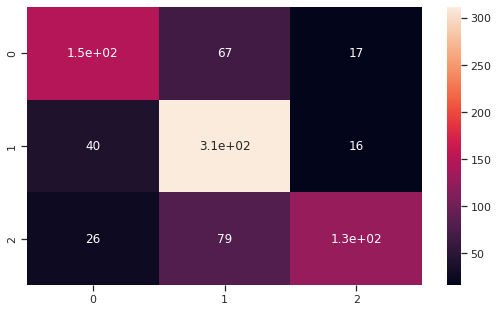


Accuracy: 0.70553

Classification Report Random Forest:
              precision    recall  f1-score   support

       DOC_0       0.69      0.64      0.66       232
       DOC_1       0.68      0.85      0.76       368
       DOC_2       0.79      0.55      0.65       232

    accuracy                           0.71       832
   macro avg       0.72      0.68      0.69       832
weighted avg       0.72      0.71      0.70       832



0.7055288461538461

In [14]:
# Random Forest
rfs = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
y_pred = rfs.fit(tf_idf_X_train, y_train).predict(tf_idf_X_test)
show_metrics(y_test, y_pred, label="Random Forest")

In [26]:
from sklearn.model_selection import learning_curve

np.random.seed(42)

train_sizes, train_scores, valid_scores  = learning_curve(
    LinearSVC(), tf_idf_X_train, y_train, cv=10
)

train_sizes, train_scores, valid_scores 


(array([ 435, 1415, 2395, 3375, 4356]),
 array([[0.9954023 , 1.        , 1.        , 1.        , 1.        ,
         1.        , 1.        , 1.        , 1.        , 1.        ],
        [0.99081272, 0.99575972, 0.99293286, 0.99222615, 0.99222615,
         0.99222615, 0.99222615, 0.99222615, 0.99222615, 0.99222615],
        [0.9908142 , 0.99164927, 0.99290188, 0.99331942, 0.98997912,
         0.99164927, 0.99164927, 0.99164927, 0.99164927, 0.99164927],
        [0.98814815, 0.98962963, 0.98903704, 0.98903704, 0.98785185,
         0.98725926, 0.98785185, 0.98637037, 0.98696296, 0.98696296],
        [0.98438935, 0.98507805, 0.98484848, 0.98553719, 0.98484848,
         0.98415978, 0.98484848, 0.98370064, 0.98347107, 0.98301194]]),
 array([[0.66528926, 0.65495868, 0.63842975, 0.67975207, 0.63636364,
         0.66528926, 0.67355372, 0.65702479, 0.61157025, 0.67768595],
        [0.71487603, 0.70041322, 0.71694215, 0.73347107, 0.69421488,
         0.7107438 , 0.68595041, 0.68181818, 0.69214876

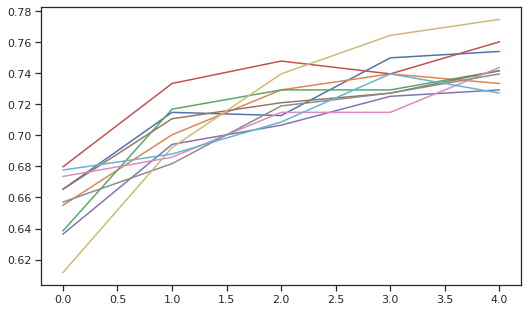

In [32]:
plt.plot(np.arange(0,len(valid_scores)),valid_scores )
plt.show()